### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [25]:
raw_data = data

In [26]:
raw_data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
type(raw_data)

pandas.core.frame.DataFrame

In [28]:
raw_data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [29]:
for i in raw_data:
    print("The unique values for column "+ i + " are as follows: ")
    print(raw_data[i].sort_values().unique())
    

The unique values for column destination are as follows: 
['Home' 'No Urgent Place' 'Work']
The unique values for column passanger are as follows: 
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
The unique values for column weather are as follows: 
['Rainy' 'Snowy' 'Sunny']
The unique values for column temperature are as follows: 
[30 55 80]
The unique values for column time are as follows: 
['10AM' '10PM' '2PM' '6PM' '7AM']
The unique values for column coupon are as follows: 
['Bar' 'Carry out & Take away' 'Coffee House' 'Restaurant(20-50)'
 'Restaurant(<20)']
The unique values for column expiration are as follows: 
['1d' '2h']
The unique values for column gender are as follows: 
['Female' 'Male']
The unique values for column age are as follows: 
['21' '26' '31' '36' '41' '46' '50plus' 'below21']
The unique values for column maritalStatus are as follows: 
['Divorced' 'Married partner' 'Single' 'Unmarried partner' 'Widowed']
The unique values for column has_children are as follows: 
[0 1]
Th

In [30]:
print(raw_data['toCoupon_GEQ5min'].isna().sum())
print(raw_data['toCoupon_GEQ5min'].unique())

0
[1]


In [31]:
car_null_count = raw_data['car'].isna().sum()

print(car_null_count)

# percentage of missing data from car column

print(car_null_count/len(raw_data)*100)

12576
99.14853358561967


<p> Since the column toCoupon_GEQ5min is never null and there is only one unique value, we can drop the column since it does not add any value to the data. Additionally, we are missing 12576 values (approx 99.14% of the data) for the car column. Therefore, we can safely drop the car column as well </p>


In [32]:
# The unique values for column Bar are as follows: 
# ['1~3' '4~8' 'gt8' 'less1' 'never' nan]
# The unique values for column CoffeeHouse are as follows: 
# ['1~3' '4~8' 'gt8' 'less1' 'never' nan]
# The unique values for column CarryAway are as follows: 
# ['1~3' '4~8' 'gt8' 'less1' 'never' nan]
# The unique values for column RestaurantLessThan20 are as follows: 
# ['1~3' '4~8' 'gt8' 'less1' 'never' nan]
# The unique values for column Restaurant20To50 are as follows: 
# ['1~3' '4~8' 'gt8' 'less1' 'never' nan]
# Columns Bar, CoffeeHouse, CarryAway, RestauranceLessThan20, Restaurant20To50 have nan values. 

Bar_null_count =  raw_data['Bar'].isna().sum()
print(Bar_null_count)
Bar_null_percent = Bar_null_count/len(raw_data)*100
print(Bar_null_percent)

CoffeeHouse_null_count = raw_data['CoffeeHouse'].isna().sum()
CoffeeHouse_null_percent = CoffeeHouse_null_count/len(raw_data)*100
print(CoffeeHouse_null_percent)

CarryAway_null_count = raw_data['CarryAway'].isna().sum()
CarryAway_null_percent = CarryAway_null_count/len(raw_data)*100
print(CarryAway_null_percent)

RestaurantLessThan20_null_count = raw_data['RestaurantLessThan20'].isna().sum()
RestaurantLessThan20_null_percent = RestaurantLessThan20_null_count/len(raw_data)*100
print(RestaurantLessThan20_null_percent)

Restaurant20To50_null_count = raw_data['Restaurant20To50'].isna().sum()
Restaurant20To50_null_percent = Restaurant20To50_null_count/len(raw_data)*100
print(Restaurant20To50_null_percent)

Total_percent = Bar_null_percent + CoffeeHouse_null_percent + CarryAway_null_percent + Restaurant20To50_null_percent + RestaurantLessThan20_null_percent

print("Total percent of Data that can have NaN in either of the above columns: " + str(Total_percent))

107
0.8435824660990224
1.7108167770419427
1.1904761904761905
1.0249132765689057
1.490066225165563
Total percent of Data that can have NaN in either of the above columns: 6.259854935351624


<p> In the analysis above, we assumed that no row can have more than one column as NaN. We see that if each of these columns have NaN is rows that are donot have NaN in the other columns, then we would actually lose 6.25% of the data, which is alot. However, after dropping the rows from these columns in a dummy dataframe, we come to know that there were 605 rows (4.76%) of data that will be deleted since there are some rows that have more than 1 column as NaN. Losing ~4% of data is also not a good sign so we can try to reduce this further. If we delete those rows that have all these columns as NaN then, we wouldnt delete much data and would also retain alot of the information. Therefore, this means that we will lose only 0.33% of the data which is still acceptable. This is shown in code blocks below

In [33]:
raw_data2 = raw_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], how='any')
len(raw_data2)
(len(data) - len(raw_data2)) / len(data) * 100

4.769788710186061

In [34]:
raw_data2 = raw_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], how='all')
len(raw_data2)
(len(data) - len(raw_data2)) / len(data) * 100

0.33112582781456956

Therefore in the analysis above, since all the columns were string values, we can either store an empty string in place of the NaN or remove the rows. If these columns were real number, we could have assumed a mean for the NaN field but in this case, it is beneficial to remove the rows completely that have all the mentioned columns as null. Moreover, the na fills

####  3. Decide what to do about your missing data -- drop, replace, other...

In [127]:
raw_data = raw_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], how='all')

In [128]:
df = raw_data.drop(columns=['car', 'toCoupon_GEQ5min'])

In [129]:
df.fillna('', inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

#### 4. What proportion of the total observations chose to accept the coupon? 



In [131]:
coupon_accepted = df.query("Y==1")
type(coupon_accepted)

total_coupons = len(df)
percent_accepted = len(coupon_accepted)/total_coupons
percent_accepted
# percent_rejected = (total_coupons - len(coupon_accepted))/total_coupons
# percent_rejected

0.5693352098683666

#### 5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:ylabel='coupon'>

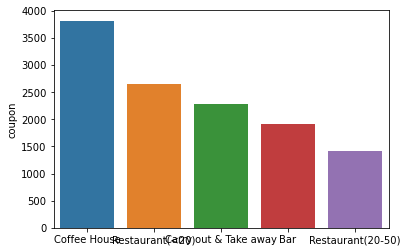

In [86]:
sns.barplot(x=df.coupon.value_counts().index, y=df.coupon.value_counts())

#### 6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

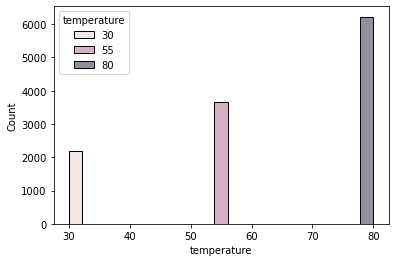

In [115]:
sns.histplot(data=df, x="temperature",hue='temperature')

In [283]:
px.histogram(data_frame=df,x='temperature',color='weather',color_discrete_sequence=px.colors.qualitative.Pastel1)

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
bar_df = df[df['coupon']=='Bar']
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

#### 2. What proportion of bar coupons were accepted?


In [142]:
bar_coupons_accepted = bar_df[bar_df['Y']==1]
print(len(bar_coupons_accepted)/len(bar_df))

# 41.19% drivers accepted a Bar coupon

0.41191845269210664


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [159]:
bar_coupon_accepted_less_than_3 = bar_df[(bar_df['Y']==1) & (bar_df['Bar']=='1~3')]
bar_coupon_accepted_more_than_3 = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']=='4~8') | (bar_df['Bar']=='gt8'))]

print(len(bar_coupon_accepted_more_than_3)/len(bar_df)) #7.68%
print(len(bar_coupon_accepted_less_than_3)/len(bar_df)) #12.80%

print(len(bar_coupon_accepted_less_than_3)/len(bar_coupon_accepted_more_than_3))

0.07684265551489806
0.12807109252483012
1.6666666666666667


12% of people accepted the bar coupon and went to the bar less than 3 times while 7% of people accepted the coupon and went to the bar more than 3 times. Therefore there are 1.667 times more people who accepted the coupon and went to the bar less than 3 times month compared to the people who accepted the coupon and went to the bar more than 3 times.  

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [219]:
# bar_df.convert_dtypes().dtypes 
# bar_df['age'].replace({'50plus':'50', 'below21':'20'}, inplace=True)
# bar_df['age'] = bar_df['age'].astype(np.int64)
# bar_df['Bar'] = bar_df['Bar'].astype(str)

bar_goers_over25_coupon_accepted = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']!='never') & (bar_df['Bar']!='less1') & (bar_df['age']>25))]
bar_goers_under25_coupon_accepted = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']!='never') & (bar_df['Bar']!='less1') & (bar_df['age']<=25))]
bar_goers_over25_coupon_acceptance_rate = len(bar_goers_over25_coupon_accepted)/len(bar_coupons_accepted)
bar_goers_under25_coupon_acceptance_rate = len(bar_goers_under25_coupon_accepted)/len(bar_coupons_accepted)
bar_goers_over25_coupon_acceptance_rate #35.27%
bar_goers_under25_coupon_acceptance_rate #14.46%

# bar_df[(bar_df['Bar']!= 'never' | bar_df['Bar']!='less1')]
# bar_df['Bar'].unique()
print(bar_goers_under25_coupon_acceptance_rate,bar_goers_over25_coupon_acceptance_rate )

0.1446700507614213 0.35279187817258884


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [ ]:

bar_no_passanger_kids_coupon_accepted = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']!='never') & (bar_df['Bar']!='less1') & (bar_df['passanger']!='Kid(s)') & (bar_df['occupation']!='Farming Fishing & Forestry'))]
bar_no_passanger_kids_coupon_accepted_rate = len(bar_no_passanger_kids_coupon_accepted) / len(bar_coupons_accepted)
# bar_goers_nokid_occupation_coupon_acceptance_rate #47.71%

bar_no_passanger_kids_coupon_accepted_rate
# 47.8% of drivers accept bar coupon with no kids and having occupation not in farming/fishing/forestry passanger.

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [249]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed

bar_no_passanger_kid_not_widowed = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']!='never') & (bar_df['Bar']!='less1') & (bar_df['passanger']!='Kid(s)') & (bar_df['maritalStatus']!='Widowed'))]
bar_no_passanger_kid_not_widowed_rate = len(bar_no_passanger_kid_notwidowed)/len(bar_coupons_accepted)
bar_no_passanger_kid_not_widowed_rate #47.71%

0.47715736040609136

In [238]:
# go to bars more than once a month and are under the age of 30 
bar_under_30 = bar_df[(bar_df['Y']==1) & ((bar_df['Bar']!='never') & (bar_df['Bar']!='less1') & (bar_df['age']<30))]
bar_under_30_rate = len(bar_under_30)/len(bar_coupons_accepted)
bar_under_30_rate # 29.94%


0.29949238578680204

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Exploring other coupon group : Carry Out and Take Away

In [272]:
carry_df = df.query("coupon == 'Carry out & Take away'")

# df['coupon'].unique()

In [273]:
carry_df.info()
carry_df.convert_dtypes().dtypes 
carry_df['age'].replace({'50plus':'50', 'below21':'20'}, inplace=True)
carry_df['age'] = carry_df['age'].astype(np.int64)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 25 to 12680
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2280 non-null   object
 1   passanger             2280 non-null   object
 2   weather               2280 non-null   object
 3   temperature           2280 non-null   int64 
 4   time                  2280 non-null   object
 5   coupon                2280 non-null   object
 6   expiration            2280 non-null   object
 7   gender                2280 non-null   object
 8   age                   2280 non-null   object
 9   maritalStatus         2280 non-null   object
 10  has_children          2280 non-null   int64 
 11  education             2280 non-null   object
 12  occupation            2280 non-null   object
 13  income                2280 non-null   object
 14  Bar                   2280 non-null   object
 15  CoffeeHouse           2280 non-null 

<ipython-input-273-4fc1aba992af>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Plot to show which gender prefers take out coupons. Visualizing the count of people accepting/rejecting the take out by their educational qualifications and income

In [279]:

px.histogram(carry_df, x='gender', color='Y', color_discrete_sequence=px.colors.qualitative.Pastel, title='Which gender prefers take out?')

In [290]:
px.histogram(carry_df, x='has_children', color='Y', color_discrete_sequence=px.colors.qualitative.Prism, title='Which gender prefers take out?')

In [278]:
px.histogram(carry_df, x='education', color='Y', color_discrete_sequence=px.colors.qualitative.Pastel1, title='Educational Qualifications of people taking Take Out food')

In [284]:
px.histogram(carry_df, x='income', color='Y', color_discrete_sequence=px.colors.qualitative.Pastel2, title='Income of people accepting/rejecting Take Out food')

From the visualizations above, we can see that women prefer to accept take out coupons more than men. Moreover, people who have completed some college or a Bachelors degrees (who typically earn $ 25,000 - $ 50,000) are the most likely to accept take away coupons.

Correlation Matrix For bar_df and carry_df: 

<AxesSubplot:>

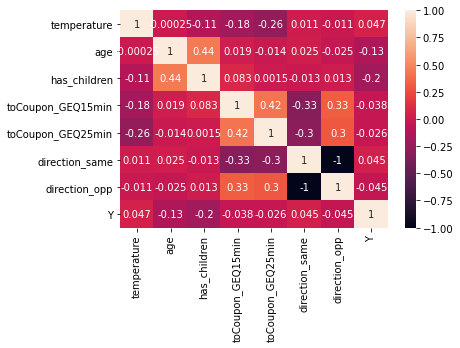

In [287]:
bar_df_corr = bar_df.corr()
sns.heatmap(bar_df_corr, annot=True)

<AxesSubplot:>

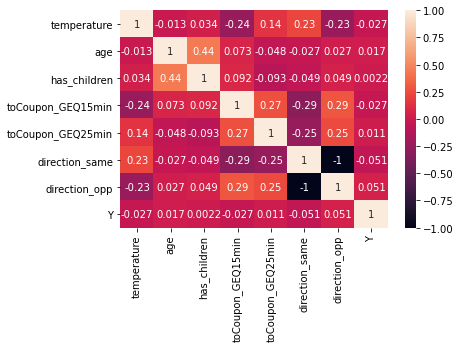

In [288]:
carry_df_corr = carry_df.corr()
sns.heatmap(carry_df_corr, annot=True)

PairPlots for bar_df and carry_df

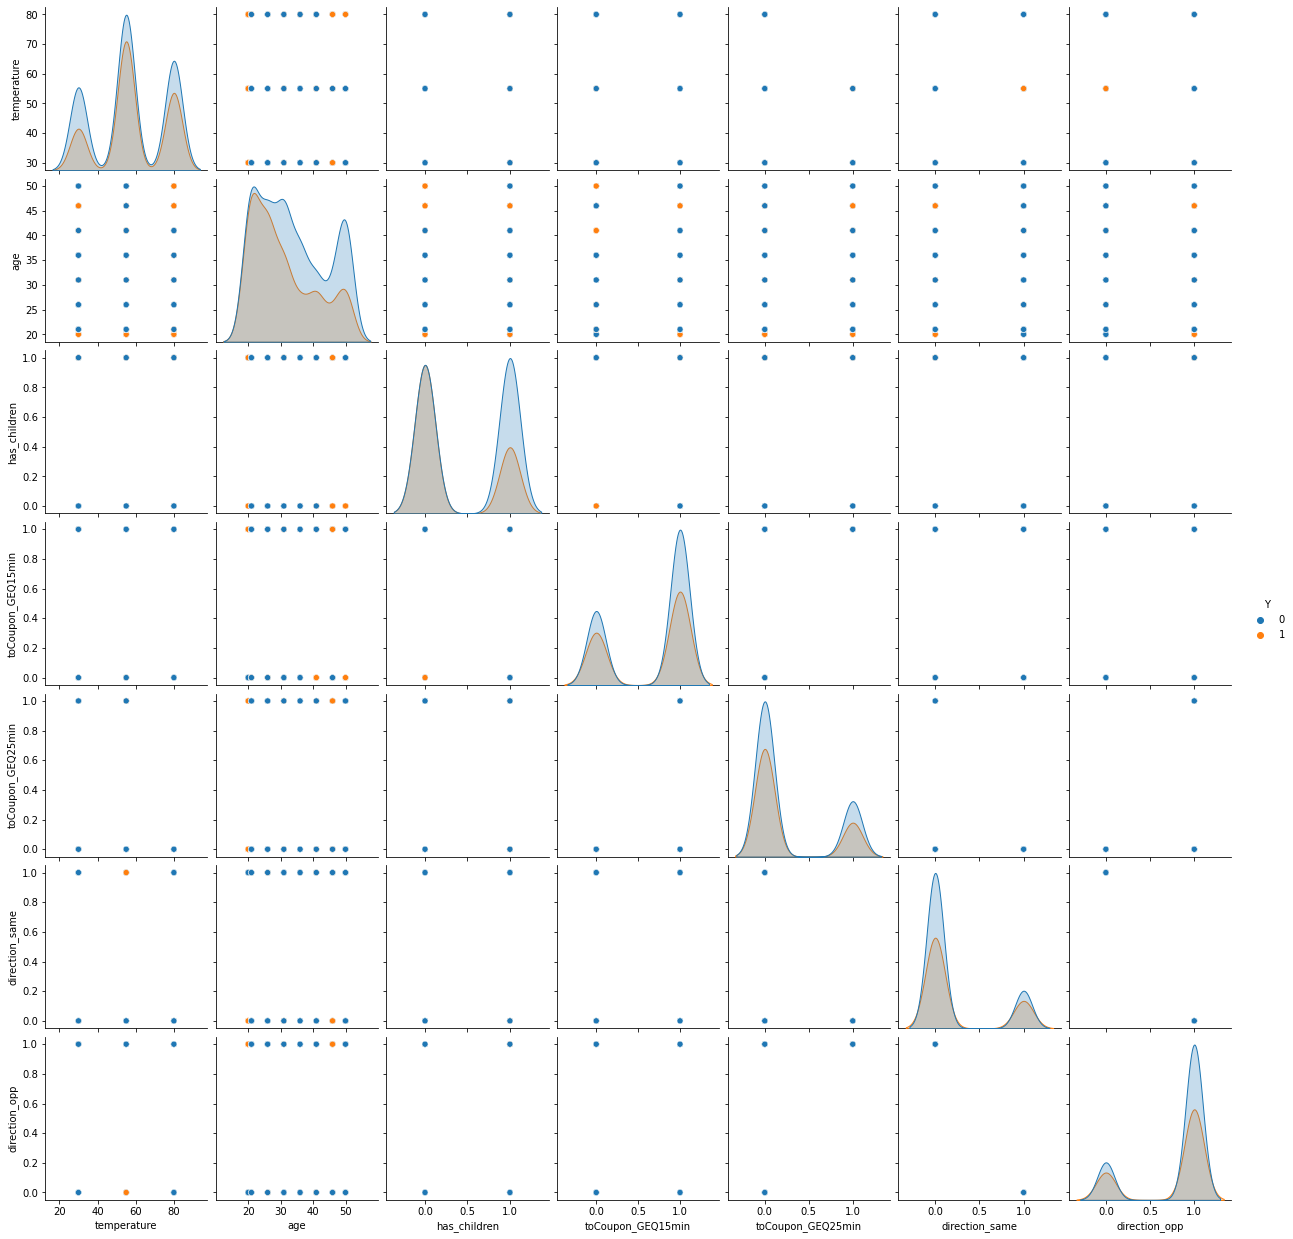

In [294]:
sns.pairplot(data=bar_df, hue='Y')

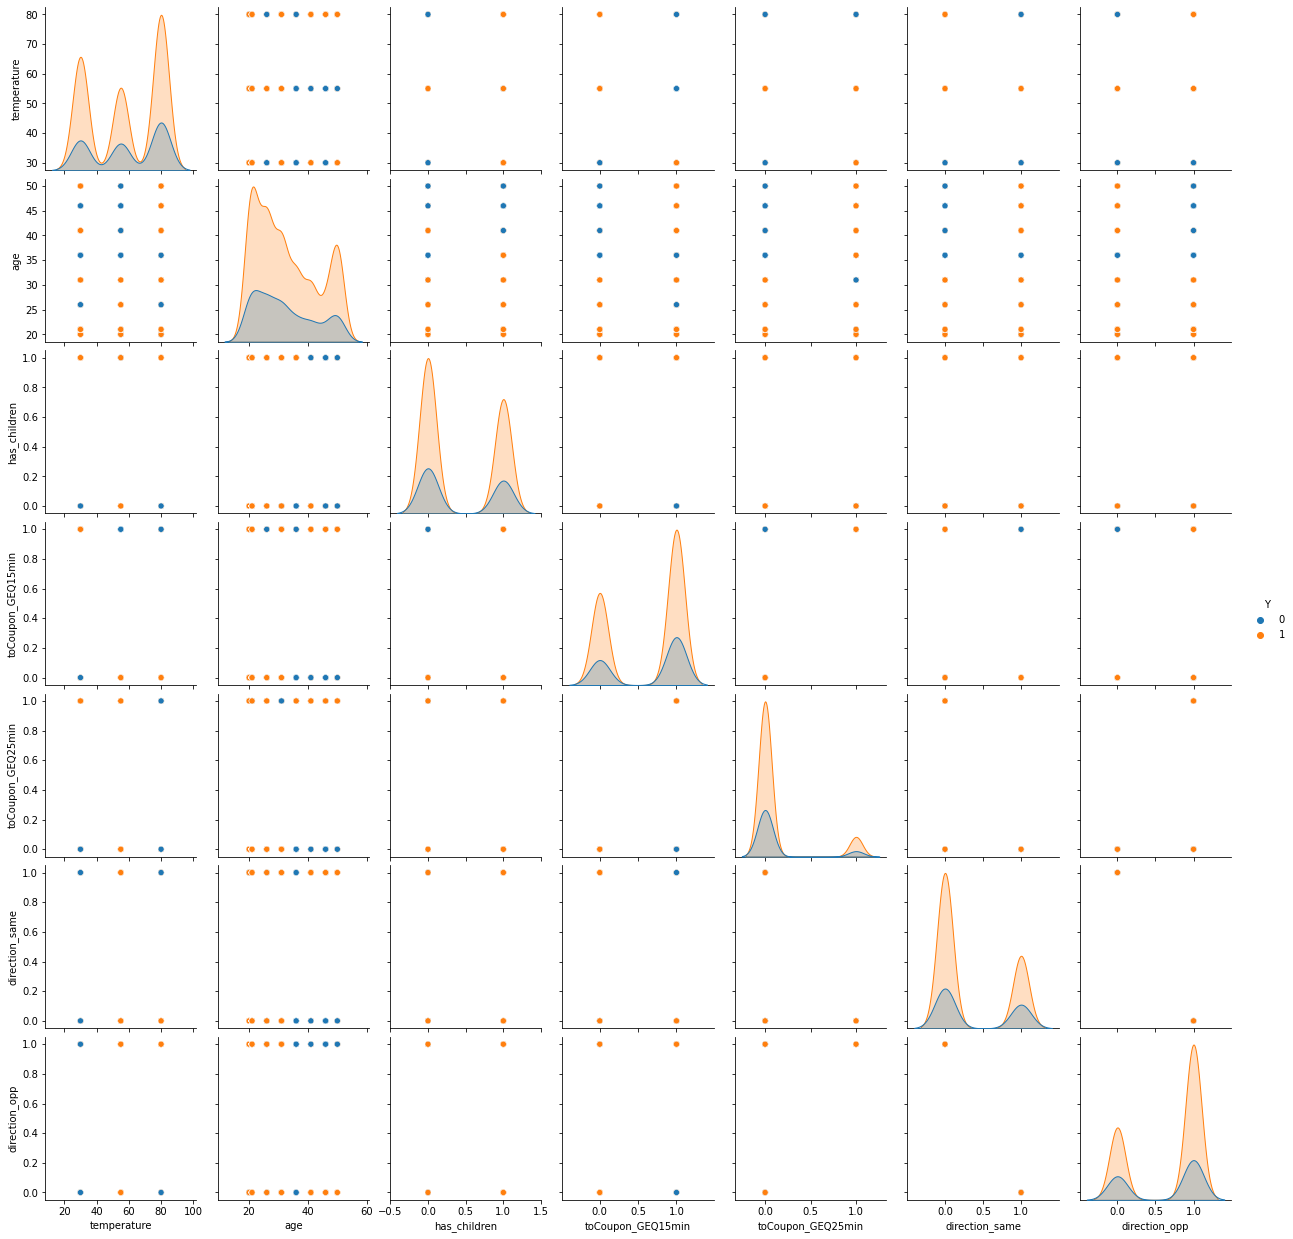

In [292]:
sns.pairplot(data=carry_df, hue='Y')